In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Load the cleaned dataset
file_path = "/content/drive/MyDrive/298_proj_docs/outputs/safe_df.csv"
df = pd.read_csv(file_path)

# Convert 'Question' and 'Answer' columns to strings (handling NaN values)
df['Question'] = df['Question'].astype("string")
df['Answer'] = df['Answer'].astype("string")
df.head()

,Question,Answer,Company,Level,Source,TechTag,question_title,question_body,answer,company,level,source,creation_month
0,Q1: Explain the central limit theorem and give...,Answers: The center limit theorem states that...,NaN,NaN,GitHub,Data Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Q2: Briefly explain the A/B testing and its ap...,A/B testing helps us to determine whether a ch...,NaN,NaN,GitHub,Data Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Q3: Describe briefly the hypothesis testing an...,In Layman's terms: - Hypothesis test is where...,NaN,NaN,GitHub,Data Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Q4: Given a left-skewed distribution that has ...,Answer: Left skewed distribution means the tai...,NaN,NaN,GitHub,Data Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Q5: What is the meaning of selection bias and ...,Answer: Sampling bias is the phenomenon that ...,NaN,NaN,GitHub,Data Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Missing Value Report**

In [ ]:
df.isnull().sum().to_dict()

{'Question': 40775,
 'Answer': 40777,
 'Company': 41295,
 'Level': 41306,
 'Source': 40775,
 'TechTag': 0,
 'question_title': 639,
 'question_body': 639,
 'answer': 639,
 'company': 41414,
 'level': 41414,
 'source': 639,
 'creation_month': 41171}

# **Data Quality Report**

In [ ]:
# Quality Assessment
quality_report = {}

# 2. Check for duplicate questions
quality_report["Duplicate Questions"] = df.duplicated(subset=['Question']).sum()

# 3. Check for missing answers
quality_report["Missing Answers"] = df['Answer'].isnull().sum()

# 4. Check for invalid difficulty levels (assuming levels should be Beginner, Intermediate, Advanced)
valid_levels = {"Beginner", "Intermediate", "Advanced"}
invalid_levels = df[~df['Level'].isin(valid_levels)]
quality_report["Invalid Difficulty Levels"] = len(invalid_levels)

# 5. Count unique companies
quality_report["Unique Companies"] = df['Company'].nunique()

# 6. Count unique technologies mentioned in the dataset
quality_report["Unique Technologies"] = df['TechTag'].nunique()

# 7. Length of Questions and Answers (Check for unusually short or long responses)
df['Question Length'] = df['Question'].apply(lambda x: len(x) if pd.notnull(x) else 0)
df['Answer Length'] = df['Answer'].apply(lambda x: len(x) if pd.notnull(x) else 0)

quality_report["Short Questions (<10 chars)"] = sum(df['Question Length'] < 10)
quality_report["Long Questions (>500 chars)"] = sum(df['Question Length'] > 500)
quality_report["Short Answers (<10 chars)"] = sum(df['Answer Length'] < 100)
quality_report["Long Answers (>1000 chars)"] = sum(df['Answer Length'] > 1000)

# 8. Check for special characters or unexpected formatting in questions
special_characters = df['Question'].str.contains(r'[^a-zA-Z0-9\s,?.!]', regex=True).sum()
quality_report["Questions with Special Characters"] = special_characters

# 9. Count of unique question formats (to see if questions are diverse)
quality_report["Unique Questions"] = df['Question'].nunique()

# Convert report to DataFrame for better visualization
quality_report_df = pd.DataFrame(quality_report.items(), columns=["Metric", "Value"])

# Display report
quality_report_df

,Metric,Value
0,Duplicate Questions,40940
1,Missing Answers,40777
2,Invalid Difficulty Levels,41414
3,Unique Companies,46
4,Unique Technologies,7
5,Short Questions (<10 chars),40778
6,Long Questions (>500 chars),3
7,Short Answers (<10 chars),40942
8,Long Answers (>1000 chars),83
9,Questions with Special Characters,229


# **Selecting Required Columns**

In [ ]:
df = df[['Question', 'Answer', 'Company', 'Level', 'Source', 'TechTag']]
df.head()

,Question,Answer,Company,Level,Source,TechTag
0,Q1: Explain the central limit theorem and give...,Answers: The center limit theorem states that...,NaN,NaN,GitHub,Data Science
1,Q2: Briefly explain the A/B testing and its ap...,A/B testing helps us to determine whether a ch...,NaN,NaN,GitHub,Data Science
2,Q3: Describe briefly the hypothesis testing an...,In Layman's terms: - Hypothesis test is where...,NaN,NaN,GitHub,Data Science
3,Q4: Given a left-skewed distribution that has ...,Answer: Left skewed distribution means the tai...,NaN,NaN,GitHub,Data Science
4,Q5: What is the meaning of selection bias and ...,Answer: Sampling bias is the phenomenon that ...,NaN,NaN,GitHub,Data Science


# **Drop empty questions and empty answers**

In [ ]:
df = df.dropna(subset=['Question', 'Answer'])
df.isnull().sum().to_dict()

{'Question': 0,
 'Answer': 0,
 'Company': 518,
 'Level': 529,
 'Source': 0,
 'TechTag': 0}

# **Removed Extra white spaces**

In [ ]:
# 1. Remove extra white spaces
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df.head()

<ipython-input-74-1418dad83161>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


,Question,Answer,Company,Level,Source,TechTag
0,Q1: Explain the central limit theorem and give...,Answers:\n\nThe center limit theorem states th...,NaN,NaN,GitHub,Data Science
1,Q2: Briefly explain the A/B testing and its ap...,A/B testing helps us to determine whether a ch...,NaN,NaN,GitHub,Data Science
2,Q3: Describe briefly the hypothesis testing an...,In Layman's terms:\n\n- Hypothesis test is whe...,NaN,NaN,GitHub,Data Science
3,Q4: Given a left-skewed distribution that has ...,Answer:\nLeft skewed distribution means the ta...,NaN,NaN,GitHub,Data Science
4,Q5: What is the meaning of selection bias and ...,Answer:\n\nSampling bias is the phenomenon tha...,NaN,NaN,GitHub,Data Science


# **Check for Duplicate Values**

In [ ]:
duplicate_qna = df.groupby(['Question', 'Answer']).size().reset_index(name='count')

# Filter to keep only the pairs that occur more than once
duplicate_qna = duplicate_qna[duplicate_qna['count'] > 1]

duplicate_qna

,Question,Answer,count
87,Are CNNs resistant to rotations,What happens to the predictions of a CNN if an...,2
89,Are there any differences between continuous a...,",Answer here",2
90,Can we formulate the search problem as a class...,How,2
91,Can we have both L1 and L2 regularization comp...,",""Yes, elastic net regularization combines L1 ...",2
92,Can we use L1 regularization for feature selec...,",""Yes, because the nature of L1 regularization...",2
...,...,...,...
467,Why do we need to split our data into three pa...,",""The training set is used to fit the model, i...",2
468,Would you prefer gradient boosting trees model...,",Usually logistic regression is better because...",2
469,Would you prefer gradient boosting trees model...,",Answer here",2
470,You have a series with a variable y and a set ...,Which approaches would you use,2


# **Dropping questions where question and answers are exactly same**

In [ ]:
df = df.drop_duplicates(subset=['Question', 'Answer'])
duplicate_qna = df.groupby(['Question', 'Answer']).size().reset_index(name='count')

# Filter to keep only the pairs that occur more than once
duplicate_qna = duplicate_qna[duplicate_qna['count'] > 1]

duplicate_qna

,Question,Answer,count


In [ ]:
import re

# Regex pattern to detect HTML tags
html_tag_pattern = re.compile(r'<[^>]+>')

# Check for presence of HTML tags
df['has_html'] = df['Question'].astype(str).apply(lambda x: bool(html_tag_pattern.search(x))) | \
                 df['Answer'].astype(str).apply(lambda x: bool(html_tag_pattern.search(x)))

# Count how many rows had HTML tags
html_tag_count = df['has_html'].sum()
print(f"Number of rows with HTML tags: {html_tag_count}")


Number of rows with HTML tags: 5


In [ ]:
df.drop(columns=['has_html'], inplace=True)

# **Removed HTML tags from text**

In [ ]:
from bs4 import BeautifulSoup

# Function to remove HTML tags
def remove_html(text):
    return BeautifulSoup(str(text), "html.parser").get_text()

df['Question'] = df['Question'].apply(remove_html)
df['Answer'] = df['Answer'].apply(remove_html)

# **Converted text to lower case**

In [ ]:
# 2. Convert all text to lowercase
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df.head()

<ipython-input-80-6a5a3bc13f41>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


,Question,Answer,Company,Level,Source,TechTag
0,q1: explain the central limit theorem and give...,answers:\n\nthe center limit theorem states th...,NaN,NaN,github,data science
1,q2: briefly explain the a/b testing and its ap...,a/b testing helps us to determine whether a ch...,NaN,NaN,github,data science
2,q3: describe briefly the hypothesis testing an...,in layman's terms:\n\n- hypothesis test is whe...,NaN,NaN,github,data science
3,q4: given a left-skewed distribution that has ...,answer:\nleft skewed distribution means the ta...,NaN,NaN,github,data science
4,q5: what is the meaning of selection bias and ...,answer:\n\nsampling bias is the phenomenon tha...,NaN,NaN,github,data science


# **Removed special characters, numbers and punctuations**

In [ ]:
# 3. Remove special characters (keeping alphanumeric and spaces) for text columns
def clean_text(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text) if isinstance(text, str) else text

text_columns = ['Question', 'Answer', 'Company', 'Level', 'TechTag']  # Update if more text fields exist
for col in text_columns:
    if col in df.columns:
        df[col] = df[col].apply(clean_text)

df.head()

,Question,Answer,Company,Level,Source,TechTag
0,q1 explain the central limit theorem and give ...,answers\n\nthe center limit theorem states tha...,NaN,NaN,github,data science
1,q2 briefly explain the ab testing and its appl...,ab testing helps us to determine whether a cha...,NaN,NaN,github,data science
2,q3 describe briefly the hypothesis testing and...,in laymans terms\n\n hypothesis test is where ...,NaN,NaN,github,data science
3,q4 given a leftskewed distribution that has a ...,answer\nleft skewed distribution means the tai...,NaN,NaN,github,data science
4,q5 what is the meaning of selection bias and h...,answer\n\nsampling bias is the phenomenon that...,NaN,NaN,github,data science


# **Expanding abbrevations**

In [ ]:
df[df['TechTag'] == 'sql']

,Question,Answer,Company,Level,Source,TechTag
17,q1 what are joins in sql and discuss its types,a join clause is used to combine rows from two...,NaN,NaN,github,sql
18,q2 define the primary foreign and unique keys ...,primary key is a key that is used to uniquely ...,NaN,NaN,github,sql
19,q3 what is the difference between between and ...,answer\n\nthe sql between operator selects val...,NaN,NaN,github,sql
20,q4 assume you have the given table below which...,alttexthttpsgithubcomyoussefhosnidatasciencein...,NaN,NaN,github,sql
21,q5 describe the advantages and disadvantages o...,answer\n\nadvantages of relational databases e...,NaN,NaN,github,sql
22,q6 assume you are given the table below on use...,1661352126442httpsuserimagesgithubusercontentc...,NaN,NaN,github,sql
23,q7 what do you understand by self join explain...,answer\n\nselfjoin is as its name implies join...,NaN,NaN,github,sql
24,q8 write an sql query to join 3 tables,1668274347333httpsuserimagesgithubusercontentc...,NaN,NaN,github,sql
25,q9 write a sql query to get the thirdhighest s...,answer,NaN,NaN,github,sql
26,q10 what is the difference between temporary t...,answer\n\n and s are both used to store inter...,NaN,NaN,github,sql


In [ ]:
# 4. Expand abbreviations in TechTag
abbreviation_dict = {
    "ml": "machine learning",
    "nlp": "natural language processing",
    "dl": "deep learning",
    "cv": "computer vision",
    "sql": "structured query language"
}

def expand_abbreviations(text):
    if isinstance(text, str):
        words = text.split()
        expanded_words = [abbreviation_dict.get(word, word) for word in words]
        return " ".join(expanded_words)
    return text

if 'TechTag' in df.columns:
    df['TechTag'] = df['TechTag'].apply(expand_abbreviations)

In [ ]:
df[df['TechTag'] == 'sql']

,Question,Answer,Company,Level,Source,TechTag


In [ ]:
df[df['TechTag'] == 'structured query language']

,Question,Answer,Company,Level,Source,TechTag
17,q1 what are joins in sql and discuss its types,a join clause is used to combine rows from two...,NaN,NaN,github,structured query language
18,q2 define the primary foreign and unique keys ...,primary key is a key that is used to uniquely ...,NaN,NaN,github,structured query language
19,q3 what is the difference between between and ...,answer\n\nthe sql between operator selects val...,NaN,NaN,github,structured query language
20,q4 assume you have the given table below which...,alttexthttpsgithubcomyoussefhosnidatasciencein...,NaN,NaN,github,structured query language
21,q5 describe the advantages and disadvantages o...,answer\n\nadvantages of relational databases e...,NaN,NaN,github,structured query language
22,q6 assume you are given the table below on use...,1661352126442httpsuserimagesgithubusercontentc...,NaN,NaN,github,structured query language
23,q7 what do you understand by self join explain...,answer\n\nselfjoin is as its name implies join...,NaN,NaN,github,structured query language
24,q8 write an sql query to join 3 tables,1668274347333httpsuserimagesgithubusercontentc...,NaN,NaN,github,structured query language
25,q9 write a sql query to get the thirdhighest s...,answer,NaN,NaN,github,structured query language
26,q10 what is the difference between temporary t...,answer\n\n and s are both used to store inter...,NaN,NaN,github,structured query language


In [ ]:
# 5. Infer difficulty levels based on question length
def infer_difficulty(question):
    if isinstance(question, str):
        word_count = len(question.split())
        if word_count < 10:
            return "Beginner"
        elif word_count < 20:
            return "Intermediate"
        else:
            return "Advanced"
    return "Unknown"

if 'Question' in df.columns:
    df['Level'] = df['Question'].apply(infer_difficulty)

# Save the cleaned dataset while maintaining column integrity
cleaned_file_path = "cleaned_safe_df.xlsx"
df.to_excel(cleaned_file_path, index=False)

# Display cleaned dataset path
print(f"Cleaned dataset saved at: {cleaned_file_path}")

Cleaned dataset saved at: cleaned_safe_df.xlsx


# **Fixing Contraction**

In [ ]:
import contractions

# Define custom contractions dictionary
custom_contractions = {
    "gonna": "going to",
    "wanna": "want to",
    "lemme": "let me",
    "gotta": "got to",
    "ain't": "is not"
}

def expand_custom(text):
    for k, v in custom_contractions.items():
        text = re.sub(rf"\b{k}\b", v, text)
    return text

def clean_contractions(text):
    text = contractions.fix(text)
    text = expand_custom(text)  # from your custom dictionary
    return text

df['Question'] = df['Question'].apply(expand_custom)
df['Answer'] = df['Answer'].apply(expand_custom)

In [ ]:
pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 10.4 MB/s eta 0:00:00


# **Tokenization**

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
def sentence_tokenize(text):
    if pd.isna(text):
        return []
    sentences = nltk.sent_tokenize(text)  # Tokenizes into sentences
    return sentences

# Word Tokenization
def word_tokenize(text):
    if pd.isna(text):
        return []
    words = nltk.word_tokenize(text)  # Tokenizes into words
    return words

df['Sentence_Question_Tokens'] = df['Question'].apply(sentence_tokenize)
df['Sentence_Answer_Tokens'] = df['Answer'].apply(sentence_tokenize)
# Apply word tokenization to the 'Question' and 'Answer' columns
df['Word_Question_Tokens'] = df['Question'].apply(word_tokenize)
df['Word_Answer_Tokens'] = df['Answer'].apply(word_tokenize)

# Check the resulting tokens
df[['Question', 'Sentence_Question_Tokens', 'Word_Question_Tokens', 'Answer', 'Sentence_Question_Tokens', 'Word_Answer_Tokens']].head()

,Question,Sentence_Question_Tokens,Word_Question_Tokens,Answer,Sentence_Question_Tokens,Word_Answer_Tokens
0,q1 explain the central limit theorem and give ...,[q1 explain the central limit theorem and give...,"[q1, explain, the, central, limit, theorem, an...",answers\n\nthe center limit theorem states tha...,[q1 explain the central limit theorem and give...,"[answers, the, center, limit, theorem, states,..."
1,q2 briefly explain the ab testing and its appl...,[q2 briefly explain the ab testing and its app...,"[q2, briefly, explain, the, ab, testing, and, ...",ab testing helps us to determine whether a cha...,[q2 briefly explain the ab testing and its app...,"[ab, testing, helps, us, to, determine, whethe..."
2,q3 describe briefly the hypothesis testing and...,[q3 describe briefly the hypothesis testing an...,"[q3, describe, briefly, the, hypothesis, testi...",in laymans terms\n\n hypothesis test is where ...,[q3 describe briefly the hypothesis testing an...,"[in, laymans, terms, hypothesis, test, is, whe..."
3,q4 given a leftskewed distribution that has a ...,[q4 given a leftskewed distribution that has a...,"[q4, given, a, leftskewed, distribution, that,...",answer\nleft skewed distribution means the tai...,[q4 given a leftskewed distribution that has a...,"[answer, left, skewed, distribution, means, th..."
4,q5 what is the meaning of selection bias and h...,[q5 what is the meaning of selection bias and ...,"[q5, what, is, the, meaning, of, selection, bi...",answer\n\nsampling bias is the phenomenon that...,[q5 what is the meaning of selection bias and ...,"[answer, sampling, bias, is, the, phenomenon, ..."


# **Stop Word Removal**

In [ ]:
from nltk.corpus import stopwords

# Download the stopwords list
nltk.download('stopwords')

# List of English stopwords from NLTK
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Function to remove stopwords from text
def remove_stopwords_nltk(tokens):
    return [word for word in tokens if word.lower() not in stop_words]

# Apply stopword removal to 'Question_Tokens' and 'Answer_Tokens' columns
df['Word_Question_Tokens_No_Stopwords'] = df['Word_Question_Tokens'].apply(remove_stopwords_nltk)
df['Word_Answer_Tokens_No_Stopwords'] = df['Word_Answer_Tokens'].apply(remove_stopwords_nltk)

# Check the resulting DataFrame
df[['Question', 'Word_Question_Tokens_No_Stopwords', 'Answer', 'Word_Answer_Tokens_No_Stopwords']].head()

,Question,Word_Question_Tokens_No_Stopwords,Answer,Word_Answer_Tokens_No_Stopwords
0,q1 explain the central limit theorem and give ...,"[q1, explain, central, limit, theorem, give, e...",answers\n\nthe center limit theorem states tha...,"[answers, center, limit, theorem, states, rand..."
1,q2 briefly explain the ab testing and its appl...,"[q2, briefly, explain, ab, testing, applicatio...",ab testing helps us to determine whether a cha...,"[ab, testing, helps, us, determine, whether, c..."
2,q3 describe briefly the hypothesis testing and...,"[q3, describe, briefly, hypothesis, testing, p...",in laymans terms\n\n hypothesis test is where ...,"[laymans, terms, hypothesis, test, current, st..."
3,q4 given a leftskewed distribution that has a ...,"[q4, given, leftskewed, distribution, median, ...",answer\nleft skewed distribution means the tai...,"[answer, left, skewed, distribution, means, ta..."
4,q5 what is the meaning of selection bias and h...,"[q5, meaning, selection, bias, avoid]",answer\n\nsampling bias is the phenomenon that...,"[answer, sampling, bias, phenomenon, occurs, r..."


# **Lemmentization**

In [ ]:
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('wordnet')

# Initialize the Lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize tokens
def lemmatize_tokens(tokens):
    # Check if the tokens are a valid list and not NaN
    if not isinstance(tokens, list):
        return []
    return [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize each word

# Apply lemmatization to pre-tokenized 'Question' and 'Answer' columns
df['Question_Lemmatized'] = df['Word_Question_Tokens_No_Stopwords'].apply(lemmatize_tokens)
df['Answer_Lemmatized'] = df['Word_Answer_Tokens_No_Stopwords'].apply(lemmatize_tokens)

# Print the result to see the lemmatized tokens
df[['Word_Question_Tokens_No_Stopwords', 'Question_Lemmatized', 'Word_Answer_Tokens_No_Stopwords', 'Answer_Lemmatized']].head()


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Word_Question_Tokens_No_Stopwords,Question_Lemmatized,Word_Answer_Tokens_No_Stopwords,Answer_Lemmatized
0,"[q1, explain, central, limit, theorem, give, e...","[q1, explain, central, limit, theorem, give, e...","[answers, center, limit, theorem, states, rand...","[answer, center, limit, theorem, state, random..."
1,"[q2, briefly, explain, ab, testing, applicatio...","[q2, briefly, explain, ab, testing, applicatio...","[ab, testing, helps, us, determine, whether, c...","[ab, testing, help, u, determine, whether, cha..."
2,"[q3, describe, briefly, hypothesis, testing, p...","[q3, describe, briefly, hypothesis, testing, p...","[laymans, terms, hypothesis, test, current, st...","[layman, term, hypothesis, test, current, stat..."
3,"[q4, given, leftskewed, distribution, median, ...","[q4, given, leftskewed, distribution, median, ...","[answer, left, skewed, distribution, means, ta...","[answer, left, skewed, distribution, mean, tai..."
4,"[q5, meaning, selection, bias, avoid]","[q5, meaning, selection, bias, avoid]","[answer, sampling, bias, phenomenon, occurs, r...","[answer, sampling, bias, phenomenon, occurs, r..."


In [ ]:
import nltk
from nltk.stem import PorterStemmer
import pandas as pd

# Download necessary NLTK data
nltk.download('punkt')

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Function to stem tokens
def stem_tokens(tokens):
    # Check if the tokens are a valid list
    if not isinstance(tokens, list):
        return []
    return [stemmer.stem(word) for word in tokens]  # Stem each word

# Apply stemming to pre-tokenized 'Question' and 'Answer' columns
df['Question_Stemmed'] = df['Word_Question_Tokens_No_Stopwords'].apply(stem_tokens)
df['Answer_Stemmed'] = df['Word_Answer_Tokens_No_Stopwords'].apply(stem_tokens)

# Print the result to see the stemmed tokens
df[['Word_Question_Tokens_No_Stopwords', 'Question_Stemmed', 'Word_Answer_Tokens_No_Stopwords', 'Answer_Stemmed']].head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Word_Question_Tokens_No_Stopwords,Question_Stemmed,Word_Answer_Tokens_No_Stopwords,Answer_Stemmed
0,"[q1, explain, central, limit, theorem, give, e...","[q1, explain, central, limit, theorem, give, e...","[answers, center, limit, theorem, states, rand...","[answer, center, limit, theorem, state, random..."
1,"[q2, briefly, explain, ab, testing, applicatio...","[q2, briefli, explain, ab, test, applic, commo...","[ab, testing, helps, us, determine, whether, c...","[ab, test, help, us, determin, whether, chang,..."
2,"[q3, describe, briefly, hypothesis, testing, p...","[q3, describ, briefli, hypothesi, test, pvalu,...","[laymans, terms, hypothesis, test, current, st...","[layman, term, hypothesi, test, current, state..."
3,"[q4, given, leftskewed, distribution, median, ...","[q4, given, leftskew, distribut, median, 60, c...","[answer, left, skewed, distribution, means, ta...","[answer, left, skew, distribut, mean, tail, di..."
4,"[q5, meaning, selection, bias, avoid]","[q5, mean, select, bia, avoid]","[answer, sampling, bias, phenomenon, occurs, r...","[answer, sampl, bia, phenomenon, occur, resear..."


# **Graphs**

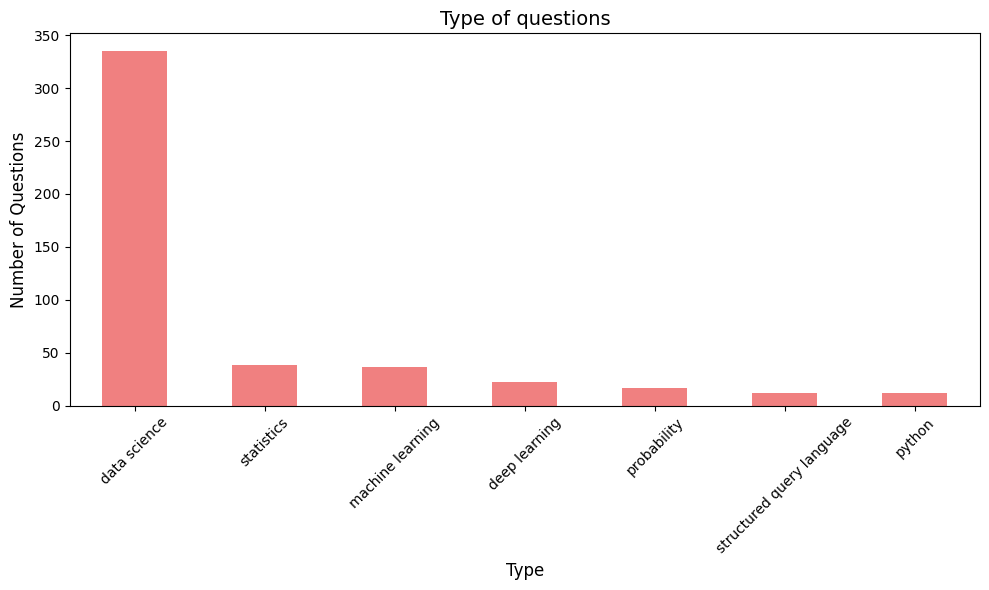

In [ ]:
tag_counts = df['TechTag'].value_counts()


# Plotting the bar chart
plt.figure(figsize=(10, 6))
tag_counts.plot(kind='bar', color='lightcoral')

# Adding title and labels
plt.title('Type of questions', fontsize=14)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Number of Questions', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

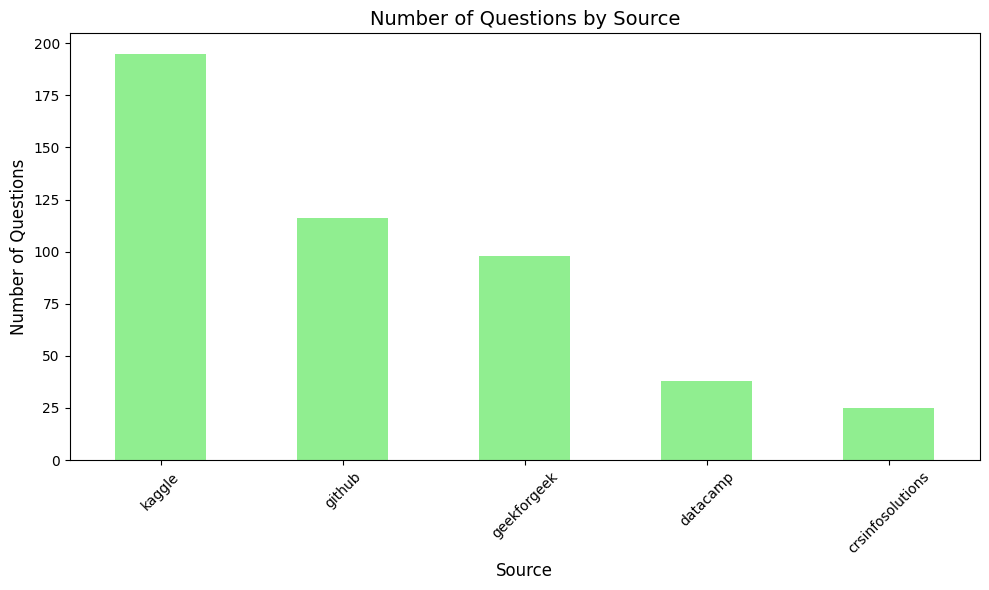

In [ ]:
source_counts = df['Source'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
source_counts.plot(kind='bar', color='lightgreen')

# Adding title and labels
plt.title('Number of Questions by Source', fontsize=14)
plt.xlabel('Source', fontsize=12)
plt.ylabel('Number of Questions', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


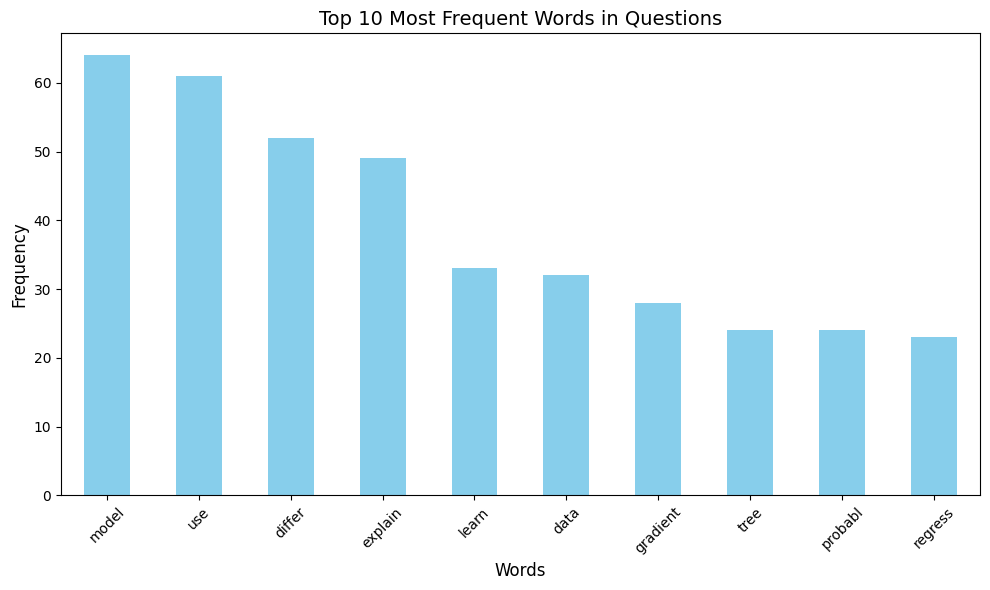

In [ ]:

# Combine all stemmed words from 'Question_Stemmed' into one string
all_question_stemmed_words = ' '.join(df['Question_Stemmed'].apply(lambda x: ' '.join(x)).tolist())

# Initialize the CountVectorizer to count word frequencies
vectorizer = CountVectorizer()

# Fit the vectorizer to the question words
X = vectorizer.fit_transform([all_question_stemmed_words])

# Get word counts as a DataFrame
word_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Sum word counts and sort in descending order
word_frequencies = word_counts.sum(axis=0).sort_values(ascending=False)

# Get the top 10 most frequent words
top_10_words = word_frequencies.head(10)


# Plotting the bar chart
plt.figure(figsize=(10, 6))
top_10_words.plot(kind='bar', color='skyblue')

# Adding title and labels
plt.title('Top 10 Most Frequent Words in Questions', fontsize=14)
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


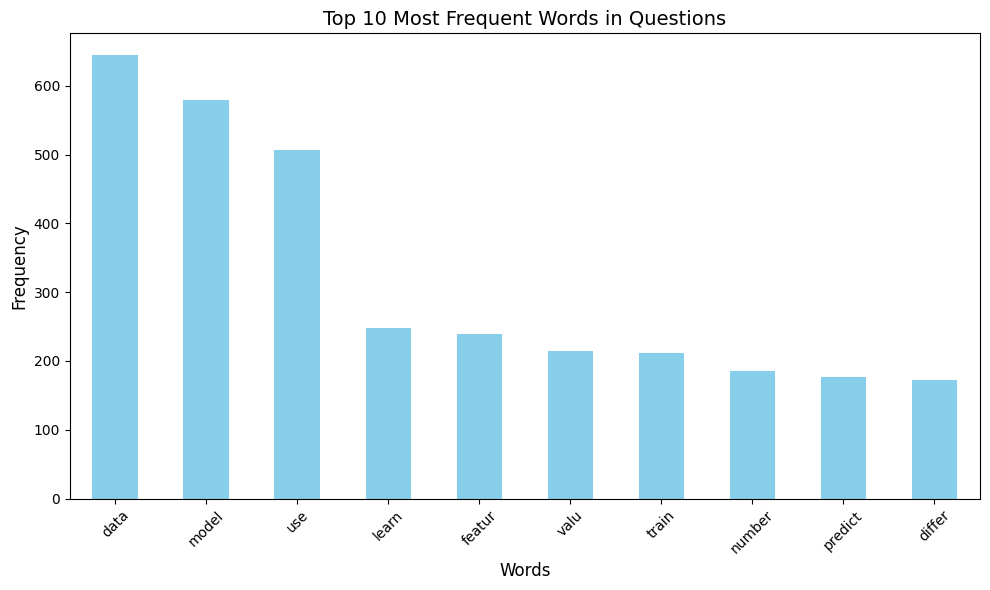

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Combine all stemmed words from 'Question_Stemmed' into one string
all_question_stemmed_words = ' '.join(df['Answer_Stemmed'].apply(lambda x: ' '.join(x)).tolist())

# Initialize the CountVectorizer to count word frequencies
vectorizer = CountVectorizer()

# Fit the vectorizer to the question words
X = vectorizer.fit_transform([all_question_stemmed_words])

# Get word counts as a DataFrame
word_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Sum word counts and sort in descending order
word_frequencies = word_counts.sum(axis=0).sort_values(ascending=False)

# Get the top 10 most frequent words
top_10_words = word_frequencies.head(10)


# Plotting the bar chart
plt.figure(figsize=(10, 6))
top_10_words.plot(kind='bar', color='skyblue')

# Adding title and labels
plt.title('Top 10 Most Frequent Words in Questions', fontsize=14)
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


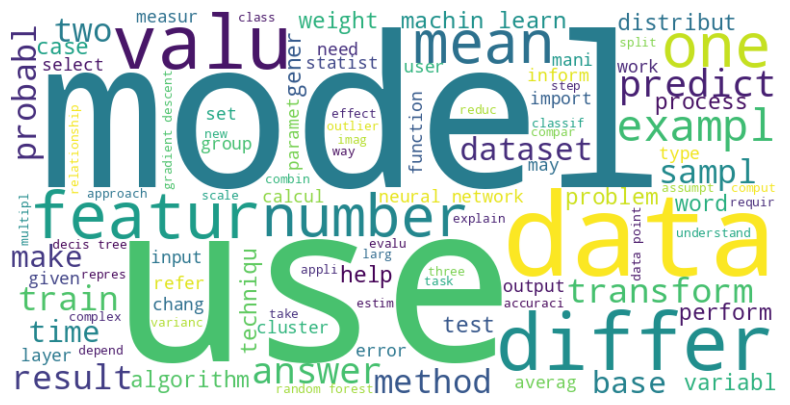

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all stemmed words from 'Question_Stemmed' and 'Answer_Stemmed' into one string
all_stemmed_words = ' '.join(df['Question_Stemmed'].apply(lambda x: ' '.join(x)).tolist() +
                             df['Answer_Stemmed'].apply(lambda x: ' '.join(x)).tolist())

# Create the WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(all_stemmed_words)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.show()
